# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../../data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
# 另存一個物件，並經過排序
target_corr = app_train.corr()['TARGET'].sort_values()

In [7]:
# 扣除TARGET本身
target_corr.pop('TARGET')

1.0

In [8]:
# 顯示前15個最小值
target_corr.head(15)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

In [9]:
# 顯示15個最大值
target_corr.tail(15)

FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
Name: TARGET, dtype: float64

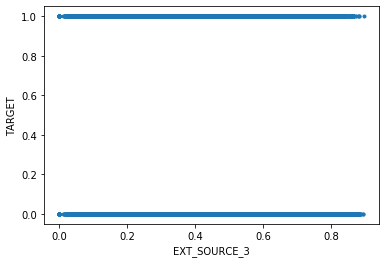

Correlation: nan


In [10]:
plt.plot(app_train['EXT_SOURCE_3'], app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'], app_train['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))   #發現有空值，且TARGET非連續型術值，須改用BOXPLOT

In [11]:
# 將apptrain 沒有空值的欄位取出
withoutna_list = app_train.columns[~app_train.isnull().any()]

In [12]:
app_train_withoutNA = app_train[withoutna_list]

In [13]:
target_corr_withoutNA = app_train_withoutNA.corr()['TARGET'].sort_values()

In [19]:
target_corr_withoutNA.to_frame()

,TARGET
DAYS_BIRTH,-0.078239
DAYS_EMPLOYED_ANOM,-0.045987
REGION_POPULATION_RELATIVE,-0.037227
NAME_CONTRACT_TYPE,-0.030896
AMT_CREDIT,-0.030369
FLAG_DOCUMENT_6,-0.028602
HOUR_APPR_PROCESS_START,-0.024166
FLAG_PHONE,-0.023806
FLAG_OWN_CAR,-0.021851
FLAG_DOCUMENT_16,-0.011615


In [26]:
target_corr_withoutNA.iloc[:15]

DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
REGION_POPULATION_RELATIVE   -0.037227
NAME_CONTRACT_TYPE           -0.030896
AMT_CREDIT                   -0.030369
FLAG_DOCUMENT_6              -0.028602
HOUR_APPR_PROCESS_START      -0.024166
FLAG_PHONE                   -0.023806
FLAG_OWN_CAR                 -0.021851
FLAG_DOCUMENT_16             -0.011615
FLAG_DOCUMENT_13             -0.011583
FLAG_DOCUMENT_14             -0.009464
FLAG_DOCUMENT_8              -0.008040
FLAG_DOCUMENT_18             -0.007952
FLAG_DOCUMENT_15             -0.006536
Name: TARGET, dtype: float64

In [16]:
target_corr_withoutNA.iloc[-16:]

FLAG_DOCUMENT_2                0.005417
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
CNT_CHILDREN                   0.019187
FLAG_WORK_PHONE                0.028524
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
TARGET                         1.000000
Name: TARGET, dtype: float64

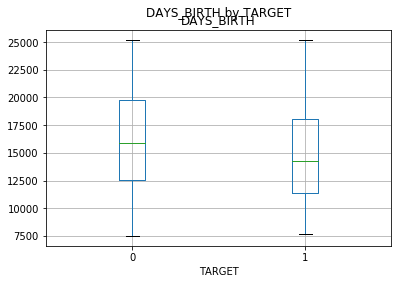

In [35]:
# 
app_train.boxplot(column='DAYS_BIRTH',by='TARGET')
plt.suptitle('DAYS_BIRTH by TARGET')
plt.show()

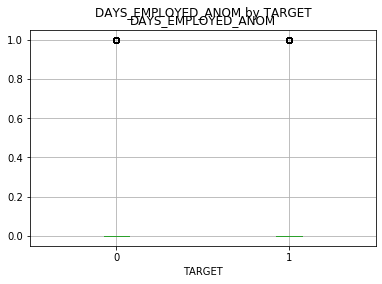

In [34]:
# DAYS_EMPLOYED_ANOM
app_train.boxplot(column='DAYS_EMPLOYED_ANOM',by='TARGET')
plt.suptitle('DAYS_EMPLOYED_ANOM by TARGET')
plt.show()

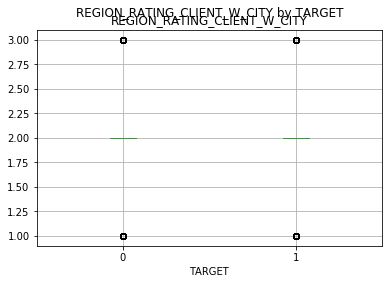

In [31]:
# REGION_RATING_CLIENT_W_CITY
app_train.boxplot(column='REGION_RATING_CLIENT_W_CITY',by='TARGET')
plt.suptitle('REGION_RATING_CLIENT_W_CITY by TARGET')
plt.show()

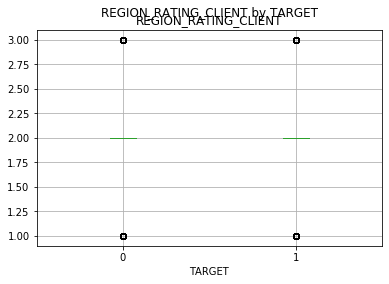

In [32]:
# REGION_RATING_CLIENT
app_train.boxplot(column='REGION_RATING_CLIENT',by='TARGET')
plt.suptitle('REGION_RATING_CLIENT by TARGET')
plt.show()

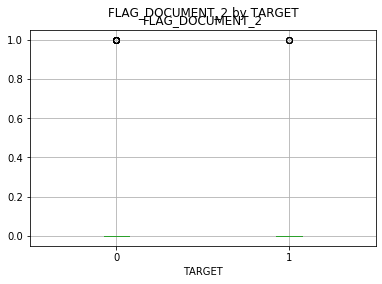

In [33]:
# FLAG_DOCUMENT_2
app_train.boxplot(column='FLAG_DOCUMENT_2',by='TARGET')
plt.suptitle('FLAG_DOCUMENT_2 by TARGET')
plt.show()